In [27]:
from pymongo import MongoClient
from functools import cmp_to_key
from pathlib import Path
from PIL import Image
import imagehash
from tqdm.notebook import tqdm
import numpy as np

from IPython.display import display, Image
from ipywidgets import widgets

In [2]:
images_dir = Path('./images')

In [3]:
mongo = MongoClient('172.17.0.1', 27017)
db = mongo['bad-vis']
imagemeta = db['imagemeta']

In [4]:
imageMetas = [m for m in imagemeta.find()]

In [5]:
phashes = [imagehash.hex_to_hash(m['phash']) for m in imageMetas]

In [6]:
distance = np.ndarray(shape=(len(phashes), len(phashes)))

In [7]:
for i in tqdm(range(len(phashes))):
    for j in range(i+1):
        diff = phashes[i] - phashes[j]
        distance[i][j] = diff
        distance[j][i] = diff

In [8]:
duplicated = distance < 5

In [16]:
images = []

In [25]:
def find_dup ():
    for i in range(len(phashes)):
        for j in range(i+1):
            if i != j and duplicated[i][j]:
                image_i = imageMetas[i]
                image_j = imageMetas[j]
                if image_i['post_id'] in image_j['duplicated_posts']:
                    continue
                if image_j['post_id'] in image_i['duplicated_posts']:
                    continue
                print(i, j)
                print(phashes[i], phashes[j])
                print(f"\'{image_i['image_id']}\', \'{image_j['image_id']}\'")
                return (image_i, image_j)

images = find_dup()

193 46
8bf4d408b73b304f 8bf4d408b73b304f
'reddit/dataisugly/4m164n:0', 'reddit/dataisugly/8q3wjm:0'


In [29]:
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

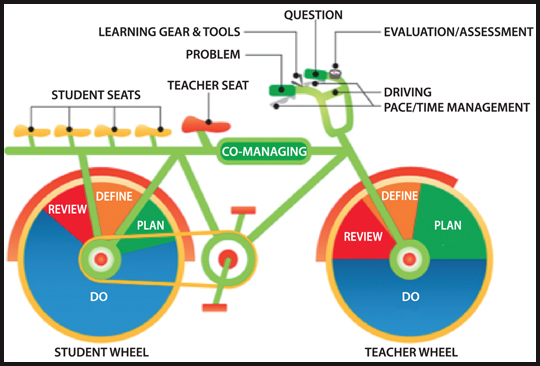

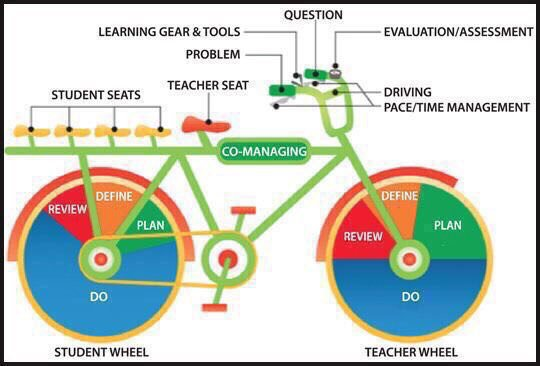

In [30]:
display(*[Image(filename=i['main_image']['file_path']) for i in images]) if images and len(images) > 0 else ''
# display(button, *[Image(filename=i['main_image']['file_path']) for i in images]) if images and len(images) > 0 else ''